In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
path = "drive/MyDrive/Articles Dataset/"
langs = ["English/", "Nepali/", "Hindi/"]

In [67]:
!pip install indic-nlp-library

from indicnlp.tokenize import sentence_tokenize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
class Article:
  emb = None
  pca_emb = None

  def __init__(self, text, lang, cat, fname):
    self.text = text
    self.lang = lang
    self.cat = cat
    self.fname = fname

  def sen_split(self):
    self.text = sentence_tokenize.sentence_split(self.text, lang=self.lang)

In [90]:
import os

articles = []

for lang in langs:
  categories = [f for f in os.listdir(path + lang) if os.path.isdir(os.path.join(path + lang, f))]
  for category in categories:
    for filename in os.listdir(path + lang + category):
        if filename[:-4] != "metadata":
            with open(os.path.join(path + lang + category, filename), 'r') as file:
                articles.append(Article(file.read(), lang[:3].lower(), category.lower(), filename.lower()))

In [70]:
!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

In [91]:
import numpy as np

for article in articles:
  article.sen_split()
  article.emb = np.mean(model.encode(article.text), axis=0)

In [92]:
embedding_space = []

for article in articles:
  embedding_space.append(article.emb)

embedding_space = np.array(embedding_space)

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(embedding_space)

PCA(n_components=2)

In [94]:
for article in articles:
  article.pca_emb = pca.transform(article.emb.reshape(1, -1))

In [95]:
color_dict = {
    'sports': '#FF5733',  # orange
    'politics': '#6B8E23',  # olive green
    'entertainment': '#BA55D3',  # medium purple
    'economics': '#1E90FF',  # dodger blue
    'crime': '#FF1493'  # deep pink
}

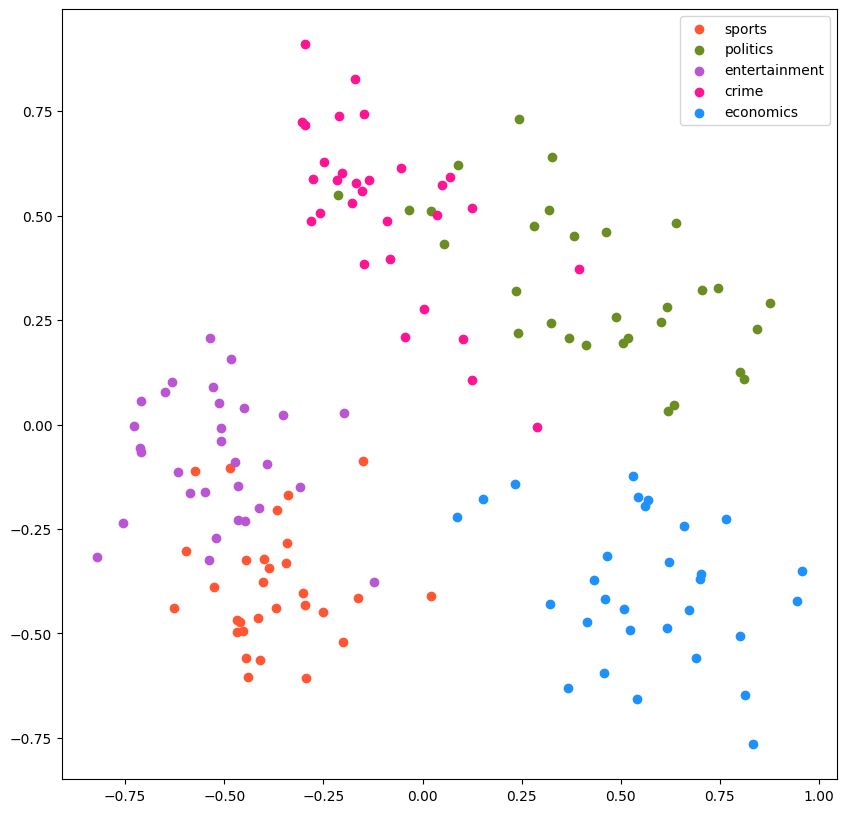

In [96]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.subplots()

emb_by_cat = {}

for article in articles:
    category = article.cat
    if category not in emb_by_cat:
        emb_by_cat[category] = []
    emb_by_cat[category].append(article.pca_emb)

for category, pca_embs in emb_by_cat.items():
    x = [pca_emb[0][0] for pca_emb in pca_embs]
    y = [pca_emb[0][1] for pca_emb in pca_embs]
    color = color_dict[category]
    ax.scatter(x, y, color=color, label=category)

ax.legend()

plt.show()

In [110]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score
scoring_funcs = [adjusted_mutual_info_score, adjusted_rand_score]

In [126]:
def get_clusters(clustering_func):
  clusters = {}
  labels = clustering_func(embedding_space)
  for i in range(len(labels)):
      cluster = labels[i]
      if cluster not in clusters:
          clusters[cluster] = []
      clusters[cluster].append(articles[i])
  for cluster, clustered_articles in clusters.items():
    print(f"Cluster {cluster}:")
    for article in clustered_articles:
      print(article.lang + ":" + article.cat)
    print("\n")
  return labels

def get_scores(labels): 
  for scoring_func in scoring_funcs:
    print(scoring_func(list(real), list(labels)))

In [164]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, BisectingKMeans, Birch
from sklearn.mixture import GaussianMixture

In [128]:
kmeans = KMeans(n_clusters=5)
results = get_clusters(kmeans.fit_predict)

Cluster 1:
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports


Cluster 3:
eng:sports
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment


Cluster 4:
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
en

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [129]:
real = []
categories = {
        "entertainment": 3,
        "sports": 1,
        "politics": 4,
        "crime": 0,
        "economics": 2
}
for article in articles:
    real.append(categories[article.cat])
real = np.array(real)

get_scores(results)

0.9107120470539389
0.9037559672370498


In [131]:
bisectingkmeans = BisectingKMeans(n_clusters=5)
results = get_clusters(bisectingkmeans.fit_predict)

Cluster 0:
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports


Cluster 1:
eng:sports
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment


Cluster 2:
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
ne

In [132]:
real = []
categories = {
        "entertainment": 1,
        "sports": 0,
        "politics": 2,
        "crime": 3,
        "economics": 4
}
for article in articles:
    real.append(categories[article.cat])
real = np.array(real)

get_scores(results)

0.8408167120542904
0.8282050454071447


In [133]:
spectral = SpectralClustering(n_clusters=5)
results = get_clusters(spectral.fit_predict)

Cluster 2:
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports


Cluster 4:
eng:sports
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:economics
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment


Cluster 0:
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
e

In [134]:
real = []
categories = {
        "entertainment": 4,
        "sports": 2,
        "politics": 0,
        "crime": 1,
        "economics": 3
}
for article in articles:
    real.append(categories[article.cat])
real = np.array(real)

get_scores(results)

0.8918019567723726
0.8869756288632217


In [136]:
agglomerative = AgglomerativeClustering(n_clusters=5)
results = get_clusters(agglomerative.fit_predict)

Cluster 3:
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports


Cluster 4:
eng:sports
eng:sports
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:sports


Cluster 1:
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
en

In [137]:
real = []
categories = {
        "entertainment": 4,
        "sports": 3,
        "politics": 1,
        "crime": 2,
        "economics": 0
}
for article in articles:
    real.append(categories[article.cat])
real = np.array(real)

get_scores(results)

0.836683514131385
0.8244545780367097


In [139]:
birch = Birch(n_clusters=5)
results = get_clusters(birch.fit_predict)

Cluster 4:
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports


Cluster 3:
eng:sports
eng:sports
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:sports


Cluster 1:
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
en

In [140]:
real = []
categories = {
        "entertainment": 3,
        "sports": 4,
        "politics": 1,
        "crime": 0,
        "economics": 2
}
for article in articles:
    real.append(categories[article.cat])
real = np.array(real)

get_scores(results)

0.8525058759781914
0.8205285790431099


In [144]:
gm = GaussianMixture(n_components=5)
results = get_clusters(gm.fit_predict)

Cluster 0:
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
eng:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
nep:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports
hin:sports


Cluster 2:
eng:sports
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
eng:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
nep:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment
hin:entertainment


Cluster 1:
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
eng:politics
en

In [145]:
real = []
categories = {
        "entertainment": 2,
        "sports": 0,
        "politics": 1,
        "crime": 3,
        "economics": 4
}
for article in articles:
    real.append(categories[article.cat])
real = np.array(real)

get_scores(results)

0.8925134678260302
0.889403284308474
